In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import csv
import datetime as dt
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv'\
                )[['DATE_OF_INTEREST','CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']]

In [3]:
df['DATE_OF_INTEREST']= pd.to_datetime(df['DATE_OF_INTEREST'])
df.set_index(['DATE_OF_INTEREST'])
df = df.iloc[:123,:]

In [4]:
w = open('COVID_cases_daily.csv', 'w')
toWrite = df.to_csv(index=False)
w.write(toWrite)
w.close()

In [5]:
df.index = pd.to_datetime(df['DATE_OF_INTEREST'], format='%Y-%m-%d')
covid_months = df.groupby(by=[df.index.month]).sum()
covid_months

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2,1,0,0
3,65190,18060,2191
4,109311,29694,12734
5,28460,4270,2830
6,10881,1594,761


In [19]:
d = covid_months.to_dict()
cases = d['CASE_COUNT']
cases = list(cases.values())
print(d)

{'CASE_COUNT': {2: 1, 3: 65190, 4: 109311, 5: 28460, 6: 10881}, 'HOSPITALIZED_COUNT': {2: 0, 3: 18060, 4: 29694, 5: 4270, 6: 1594}, 'DEATH_COUNT': {2: 0, 3: 2191, 4: 12734, 5: 2830, 6: 761}}


In [7]:
rides_df = pd.read_csv('taxi_trips_per_day.csv', header=None)
rides_df.index = pd.to_datetime(rides_df[0], format='%Y-%m-%d')
months = rides_df.groupby(by=[rides_df.index.month, rides_df.index.year]).sum()

d = months.to_dict()[1]
Y19_months = []
Y20_months = []
dates = []
for x in d.items():
    if x[0][1] == 2019:
        Y19_months.append(x[1])
    else:
        Y20_months.append(x[1])

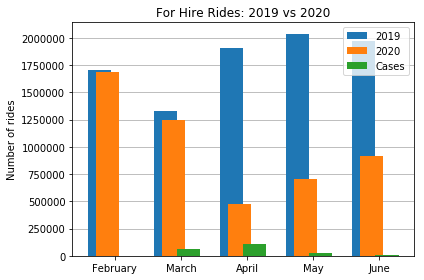

In [9]:
labels = ['February', 'March', 'April', 'May', 'June']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, Y19_months, width, label='2019', zorder=3)
rects2 = ax.bar(x - width/3, Y20_months, width, label='2020', zorder=3)
rects3 = ax.bar(x + width/3, cases, width, label='Cases', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of rides')
ax.set_title('For Hire Rides: 2019 vs 2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', zorder=0)

fig.tight_layout()

plt.show()

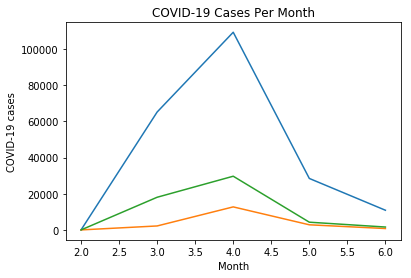

In [38]:
labels = ['February', 'March', 'April', 'May', 'June']
fig, ax = plt.subplots()
x = np.arange(len(labels))  # the label locations
data = d['CASE_COUNT']
names = list(data.keys())
cases_values = list(data.values())
deaths_values = list(d['DEATH_COUNT'].values())
hosp_values = list(d['HOSPITALIZED_COUNT'].values())

# values.insert(0,0)
# names.insert(0,0)
ax.set_title('COVID-19 Cases Per Month')
ax.set_ylabel('COVID-19 cases')
ax.set_xlabel('Month')

ax.plot(names, cases_values)
ax.plot(names, deaths_values)
ax.plot(names, hosp_values)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
plt.show()